<a href="https://colab.research.google.com/github/epic-coder97/EV---Adoption---MA/blob/main/EV_Adoption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EV Adoption Analysis

This notebook analyzes the EV adoption trends based on the provided vehicle registration dataset.

Handling Missing Data
The ZipCode column has missing values, which is critical since we need it to analyze EV adoption by ZIP code.

Why Impute?
- If we drop missing values, we might lose a large portion of the data.
- We can infer the missing ZIP codes based on the - Municipality, assuming each municipality is primarily associated with one ZIP code.
### Imputation Approach
We will fill missing ZIP codes based on the most common ZIP code per Municipality.

In [3]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "MVC_Bi_Annual_Zip_Code.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Impute missing ZipCode values using the most common ZipCode per Municipality
df['ZipCode'] = df.groupby('Municipality')['ZipCode'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

df.head()


,Date,Municipality,ZipCode,FuelClass,VehicleUse,Count,DailyVMT
0,2020-01-01,ABINGTON,2351.0,Fossil Fuel,Passenger,221,6242.126079
1,2020-01-01,ABINGTON,2351.0,Fossil Fuel,Municipal,2,47.091916
2,2020-01-01,ABINGTON,2351.0,Fossil Fuel,Commercial,200,8676.377858
3,2020-01-01,ABINGTON,2351.0,Hybrid,Passenger,3,92.945388
4,2020-01-01,ABINGTON,2351.0,Zero-Emission,Passenger,1,30.683294


In [4]:

# Filter data for 2024 and Zero-Emission Vehicles (EVs)
df_2024 = df[(df['Date'].dt.year == 2024) & (df['FuelClass'] == 'Zero-Emission')]

# Aggregate EV count by ZipCode
top_zip_codes = df_2024.groupby('ZipCode')['Count'].sum().nlargest(10)

# Display top 10 ZIP codes
top_zip_codes


,Count
ZipCode,
2128.0,8496
1742.0,2560
1760.0,2493
1720.0,2315
1810.0,2304
2421.0,2242
2155.0,2179
2420.0,2175
1545.0,2174


In [5]:

# Extract the top 10 ZIP codes
top_zip_list = top_zip_codes.index.tolist()

# Filter data for these top 10 ZIP codes
df_top_zip_ev = df[(df['ZipCode'].isin(top_zip_list)) & (df['FuelClass'] == 'Zero-Emission')]

# Aggregate EV count over the years
ev_growth = df_top_zip_ev.groupby([df_top_zip_ev['Date'].dt.year, 'ZipCode'])['Count'].sum().unstack()

# Display the EV adoption growth over the years
ev_growth


ZipCode,1545.0,1720.0,1742.0,1760.0,1810.0,2128.0,2155.0,2420.0,2421.0,2478.0
Date,,,,,,,,,,
2020,480,687,795,660,690,106,491,702,749,686
2021,629,896,1106,867,892,157,666,963,884,910
2022,927,1230,1512,1228,1200,984,1034,1239,1242,1237
2023,1423,1718,1973,1737,1684,4495,1428,1690,1710,1583
2024,2174,2315,2560,2493,2304,8496,2179,2175,2242,2122
2025,1361,1375,1497,1545,1394,3809,1400,1280,1357,1308


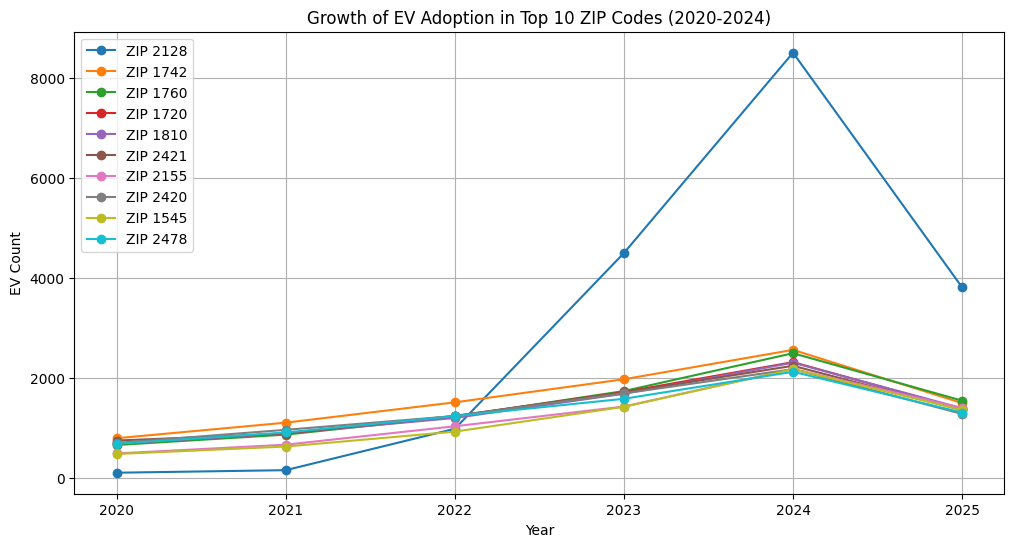

In [6]:

# Plot the EV adoption growth over the years for the top 10 ZIP codes
plt.figure(figsize=(12, 6))

for zip_code in top_zip_list:
    plt.plot(ev_growth.index, ev_growth[zip_code], marker='o', label=f'ZIP {int(zip_code)}')

plt.xlabel('Year')
plt.ylabel('EV Count')
plt.title('Growth of EV Adoption in Top 10 ZIP Codes (2020-2024)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Here is a visualization of the EV adoption growth over the years (2020-2024) for the top 10 ZIP codes. The trend clearly shows an increasing number of EV registrations over time, with some ZIP codes experiencing sharper growth, particularly in 2023 and 2024. Let me know if you need further insights!